# HEALTHWELL ANALYSIS

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df1=pd.read_excel("C:\\Users\\ajaya\\Downloads\\Assignment - Data Analysis\\Healthwell Data\\Healthwell Customer Data.xlsx",engine='openpyxl')
df2=pd.read_csv("C:\\Users\\ajaya\\Downloads\\Assignment - Data Analysis\\Healthwell Data\\Healthwell Money claimed Data.csv")

In [63]:
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [64]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


#### merging the two data set 

In [65]:
df=pd.merge(df1,df2)
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


In [66]:
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [67]:
df.shape

(1338, 8)

### This dataset contains 1330 rows and 7 columns

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


## Exploratory Data Analysis

In [69]:
df.columns

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')

In [70]:
df.isnull().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

#### There are no null Values

### Q1. Does the gender of the person matter for the company as a constraint for extending policies?

In [71]:
pd.get_dummies(df['sex'],prefix='Gender').head()

,Gender_female,Gender_male
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [72]:
df=pd.concat([df,pd.get_dummies(df['sex'],prefix='Gender')],axis=1)

In [73]:
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,Gender_female,Gender_male
0,PLC157006,0,no,southwest,23,male,34.4,1826.843,0,1
1,PLC157033,1,no,southwest,19,male,24.6,1837.237,0,1
2,PLC157060,0,no,southwest,56,male,40.3,10602.385,0,1
3,PLC157087,1,no,southwest,30,female,32.4,4149.736,1,0
4,PLC157186,5,no,southwest,19,female,28.6,4687.797,1,0


Number of Male Who taken Policy:  676
Number of Female Who taken Policy:  662


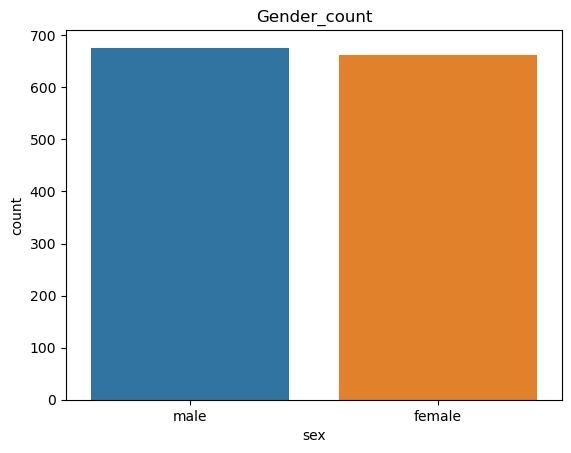

In [74]:
sns.countplot(data=df,x='sex',label='count')
M, F = df['sex'].value_counts()
plt.title('Gender_count')
print('Number of Male Who taken Policy: ',M)
print('Number of Female Who taken Policy: ',F)

#### From this Visualization we can understand the proportion of male and female is nearly equal.So the gender of the person doesnot matter for the company as a constraint for extending policies.

### Q2. What is the average amount of money the company spent on each policy cover?

In [75]:
total_amount=df['charges in INR'].sum()
total_policies=df['Policy no.'].count()
average_amount=total_amount/total_policies

In [76]:
print('The Average amount Company Spent On Each Policy Cover Is:',round(average_amount,2))

The Average amount Company Spent On Each Policy Cover Is: 13270.42


### Q3. Could you advise if the company needs to offer separate policies based upon the geographic location of the person?

No of Policies in SouthWest Region: 325
No of Policies in SouthEast Region: 364
No of Policies in NorthWest Region: 325
No of Policies in NorthEast Region: 324


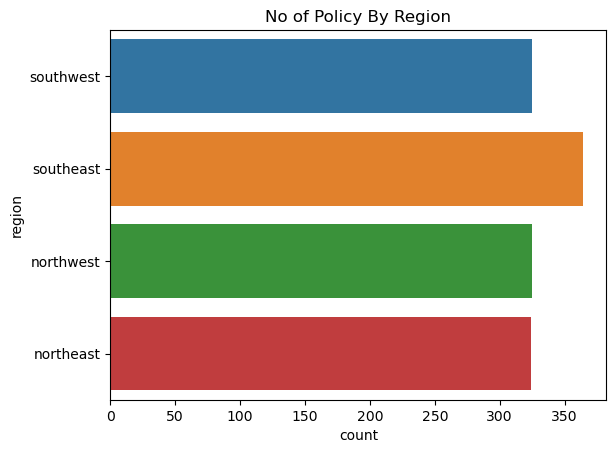

In [77]:
sns.countplot(data=df,y='region')
plt.title('No of Policy By Region')
se,sw,nw,ne=df['region'].value_counts()
print('No of Policies in SouthWest Region:',sw)
print('No of Policies in SouthEast Region:',se)
print('No of Policies in NorthWest Region:',nw)
print('No of Policies in NorthEast Region:',ne)

#### The company should implement seperate policies on the SouthWest,NorthWest,NorthEast Regions beacuse the no of policy holders is less compared to the south east region.

### Q4. Does the no. of dependents make a difference in the amount claimed?

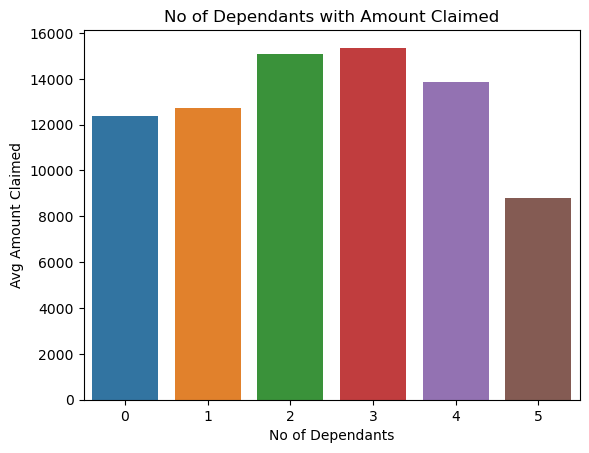

In [78]:
average_amount = df.groupby('children')['charges in INR'].mean().reset_index()
sns.barplot(x='children',y='charges in INR',data=average_amount)
plt.title('No of Dependants with Amount Claimed')
plt.xlabel('No of Dependants')
plt.ylabel('Avg Amount Claimed')
plt.show()

##### From this Visualization we can understand that the No of dependants does affect the amount claimed.



###### 1)The most amount claimed by customer having 3 dependants.


###### 2)The least amount claimed by customer having 5 dependants.

### Q5. Does a study of a person’s BMI give the company any idea for the insurance claim that it would extend?

#### Yes studying a person's BMI give a vital role in extending the insurance claim.BMI index show the person is underweight or overweight. Underweight and Overweight  is considered as a risk factor for extending policy claim.Value under 18.5 is considered as underweight,18.5-24.9 is considered as normal weight and above 24.9 is considered as overweight.

In [79]:
def weight(row):
    if row['bmi']>24.9:
        return 'Over Weight'
    elif row['bmi']<18.5:
        return 'Under Weight'
    else:
        return 'Normal Weight'
df['Weight']=df.apply(weight,axis=1)

In [80]:
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,Gender_female,Gender_male,Weight
0,PLC157006,0,no,southwest,23,male,34.4,1826.843,0,1,Over Weight
1,PLC157033,1,no,southwest,19,male,24.6,1837.237,0,1,Normal Weight
2,PLC157060,0,no,southwest,56,male,40.3,10602.385,0,1,Over Weight
3,PLC157087,1,no,southwest,30,female,32.4,4149.736,1,0,Over Weight
4,PLC157186,5,no,southwest,19,female,28.6,4687.797,1,0,Over Weight


No of Policy Members With Over Weight: 1096
No of Policy Members With Normal Weight: 222
No of Policy Members With Under Weight: 20


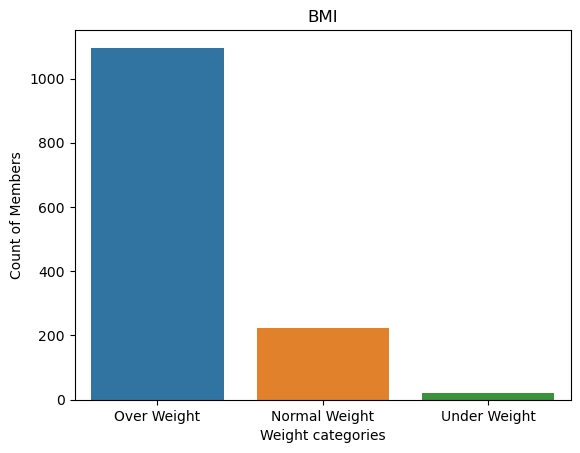

In [81]:
sns.countplot(data=df,x='Weight')
plt.title('BMI')
plt.xlabel('Weight categories')
plt.ylabel('Count of Members')

o,n,u=df['Weight'].value_counts()
print('No of Policy Members With Over Weight:',o)
print('No of Policy Members With Normal Weight:',n)
print('No of Policy Members With Under Weight:',u)

#### From This we can understand that most of the policy members are overweight acording to the BMI value So the company should consider before extending their policy. Or the company should Introduce new policy for the policy members to decrease the risk factor.

### Q6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

####  smoking status is often a critical factor. Smokers are at a higher risk of various health conditions, including lung cancer, heart disease, and respiratory issues.

No of Policy Members Who Doesnot Smoke : 1064
No of Policy Members Who Smokes : 274


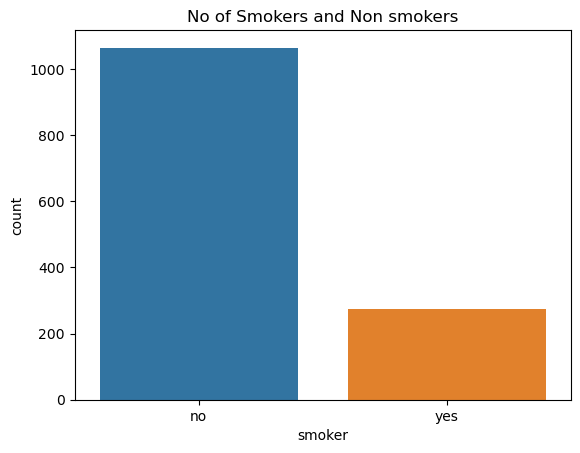

In [82]:
sns.countplot(data=df,x='smoker')
plt.title('No of Smokers and Non smokers')
n,y=df['smoker'].value_counts()
print('No of Policy Members Who Doesnot Smoke :',n)
print('No of Policy Members Who Smokes :',y)

#### From this visualisation we can understand that most of the policy members are non smokers.But a small amount of people are smokers the company should increase premium amounts for policy members who smokes.

### Q7. Does age have any barrier on the insurance claimed?

#### Age can affect health insurance claims in several ways. Older individuals may require more frequent medical care and may be more susceptible to certain health conditions.


In [83]:
def age(row):
    if row['age']>64:
        return 'Senor category'
    elif row['age']<=25:
        return 'Youth category'
    else:
        return 'Adult Category'

df['Age_Category']=df.apply(age,axis=1)
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,Gender_female,Gender_male,Weight,Age_Category
0,PLC157006,0,no,southwest,23,male,34.4,1826.843,0,1,Over Weight,Youth category
1,PLC157033,1,no,southwest,19,male,24.6,1837.237,0,1,Normal Weight,Youth category
2,PLC157060,0,no,southwest,56,male,40.3,10602.385,0,1,Over Weight,Adult Category
3,PLC157087,1,no,southwest,30,female,32.4,4149.736,1,0,Over Weight,Adult Category
4,PLC157186,5,no,southwest,19,female,28.6,4687.797,1,0,Over Weight,Youth category


No of policy members in Youth category : 1032
No of Policy Members in Adult category : 306


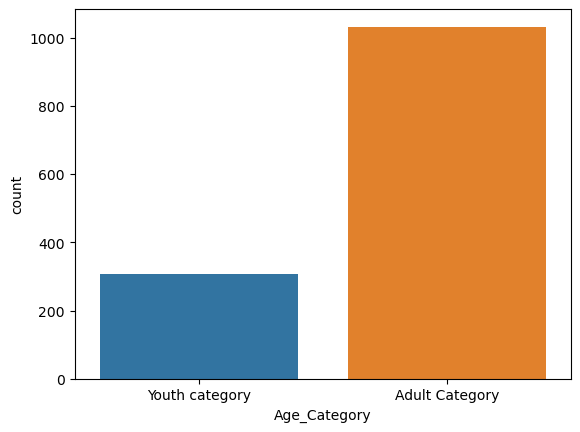

In [84]:
sns.countplot(data=df,x='Age_Category')

y,a=df['Age_Category'].value_counts()
print('No of policy members in Youth category :',y)
print('No of Policy Members in Adult category :',a)

#### From this analysis we can see that there is no senior citizen thus company risk factor decreases.youth citizen and adult citizen are mostly healthy people with less chance of getting a health condition.thus the amount claimed by these category will be less.

### Q8. Can the company extend certain discounts after checking the health status (BMI) in this case?

No of Policy Members With Over Weight: 1096
No of Policy Members With Normal Weight: 222
No of Policy Members With Under Weight: 20


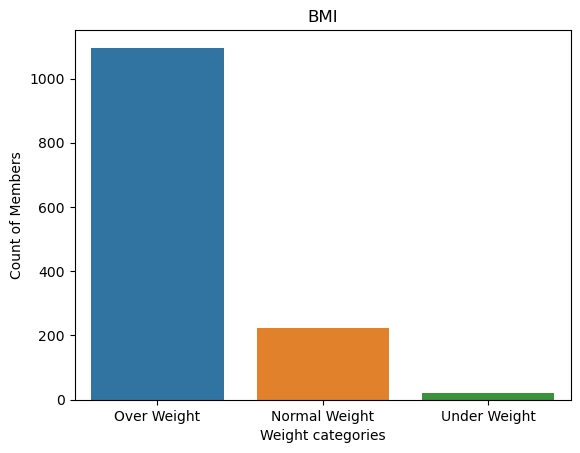

In [85]:
sns.countplot(data=df,x='Weight')
plt.title('BMI')
plt.xlabel('Weight categories')
plt.ylabel('Count of Members')

o,n,u=df['Weight'].value_counts()
print('No of Policy Members With Over Weight:',o)
print('No of Policy Members With Normal Weight:',n)
print('No of Policy Members With Under Weight:',u)

#### Yes the company can extend certain discounts after checkin health status Using BMI . normal weight is considered as healthy hence the company can extend certains discount for this particular category of people. 

### from this analysis we understood that Age,BMI,Smoker,dependants are a important factor in health insurance.

# Linear regression model

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



In [87]:
def smok(row):
    if row['smoker']=='no':
        return 0
    else:
        return 1
df['smoker']=df.apply(smok,axis=1)

In [88]:
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,Gender_female,Gender_male,Weight,Age_Category
0,PLC157006,0,0,southwest,23,male,34.400,1826.84300,0,1,Over Weight,Youth category
1,PLC157033,1,0,southwest,19,male,24.600,1837.23700,0,1,Normal Weight,Youth category
2,PLC157060,0,0,southwest,56,male,40.300,10602.38500,0,1,Over Weight,Adult Category
3,PLC157087,1,0,southwest,30,female,32.400,4149.73600,1,0,Over Weight,Adult Category
4,PLC157186,5,0,southwest,19,female,28.600,4687.79700,1,0,Over Weight,Youth category
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,PLC168400,1,1,northeast,39,male,29.925,22462.04375,0,1,Over Weight,Adult Category
1334,PLC168436,0,1,northeast,18,female,21.660,14283.45940,1,0,Normal Weight,Youth category
1335,PLC168634,2,1,northeast,42,male,24.605,21259.37795,0,1,Normal Weight,Adult Category
1336,PLC168652,0,1,northeast,29,female,21.850,16115.30450,1,0,Normal Weight,Adult Category


### Dropping unnecassery columns

In [89]:
df.drop('region',axis=1,inplace=True)


In [90]:
df.drop('sex',axis=1,inplace=True)

In [91]:
df.head()

,Policy no.,children,smoker,age,bmi,charges in INR,Gender_female,Gender_male,Weight,Age_Category
0,PLC157006,0,0,23,34.4,1826.843,0,1,Over Weight,Youth category
1,PLC157033,1,0,19,24.6,1837.237,0,1,Normal Weight,Youth category
2,PLC157060,0,0,56,40.3,10602.385,0,1,Over Weight,Adult Category
3,PLC157087,1,0,30,32.4,4149.736,1,0,Over Weight,Adult Category
4,PLC157186,5,0,19,28.6,4687.797,1,0,Over Weight,Youth category


In [92]:
df.drop('Policy no.',axis=1,inplace=True)

In [93]:
df.drop('Weight',axis=1,inplace=True)

In [94]:
df.drop('Age_Category',axis=1,inplace=True)

In [95]:
df.head()

,children,smoker,age,bmi,charges in INR,Gender_female,Gender_male
0,0,0,23,34.4,1826.843,0,1
1,1,0,19,24.6,1837.237,0,1
2,0,0,56,40.3,10602.385,0,1
3,1,0,30,32.4,4149.736,1,0
4,5,0,19,28.6,4687.797,1,0


#### Finding Corelation of each columns 

In [96]:
df.corr()

,children,smoker,age,bmi,charges in INR,Gender_female,Gender_male
children,1.000000,0.007673,0.042469,0.012759,0.067998,-0.017163,0.017163
smoker,0.007673,1.000000,-0.025019,0.003750,0.787251,-0.076185,0.076185
age,0.042469,-0.025019,1.000000,0.109272,0.299008,0.020856,-0.020856
bmi,0.012759,0.003750,0.109272,1.000000,0.198341,-0.046371,0.046371
charges in INR,0.067998,0.787251,0.299008,0.198341,1.000000,-0.057292,0.057292
Gender_female,-0.017163,-0.076185,0.020856,-0.046371,-0.057292,1.000000,-1.000000
Gender_male,0.017163,0.076185,-0.020856,0.046371,0.057292,-1.000000,1.000000


#### From this We can Understand That Charges in INR are Mostly Corelated with Age and BMI

### Split Data into Features (x) and Target (y)

In [97]:
x=df.drop('charges in INR',axis=1)
y=df['charges in INR']

In [98]:
x

,children,smoker,age,bmi,Gender_female,Gender_male
0,0,0,23,34.400,0,1
1,1,0,19,24.600,0,1
2,0,0,56,40.300,0,1
3,1,0,30,32.400,1,0
4,5,0,19,28.600,1,0
...,...,...,...,...,...,...
1333,1,1,39,29.925,0,1
1334,0,1,18,21.660,1,0
1335,2,1,42,24.605,0,1
1336,0,1,29,21.850,1,0


In [99]:
y

0        1826.84300
1        1837.23700
2       10602.38500
3        4149.73600
4        4687.79700
           ...     
1333    22462.04375
1334    14283.45940
1335    21259.37795
1336    16115.30450
1337    28101.33305
Name: charges in INR, Length: 1338, dtype: float64

#### Split Data into Training and Testing Sets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

####  Initialize and train a Linear Regression model

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Make predictions on the test set

In [102]:
y_pred = model.predict(X_test)

#### Evaluating the model


mse=Mean squared error
mae=Mean absolute error
rmse=Root Mean Squared Error
r2= R-squared Score

In [103]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



##### Printing the values

In [104]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 38561491.17955518
Root Mean Squared Error (RMSE): 6209.789946492166
Mean Absolute Error (MAE): 4216.4212972131945
R-squared (R2) Score: 0.7286261479143632


In [105]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 4.33984343e+02  2.40966455e+04  2.56685360e+02  3.07504184e+02
  2.10855199e+01 -2.10855199e+01]
Model Intercept: -11644.303266585008


### Hyper parametrically tuning the model for getting best result

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Creating the GridSearchCV object with cross-validation and Fiting the grid search to the data

In [107]:
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

####  Getting the best hyperparameters and Model

In [111]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [112]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f'Best Model - Mean Squared Error: {mse}')
print(f'rmse :{rmse}')
print(f'R-squared: {r_squared}')


Best Model - Mean Squared Error: 38561491.17955518
rmse :6209.789946492166
R-squared: 0.7286261479143632


### Visualising the Actual and Predicted Claim Amount

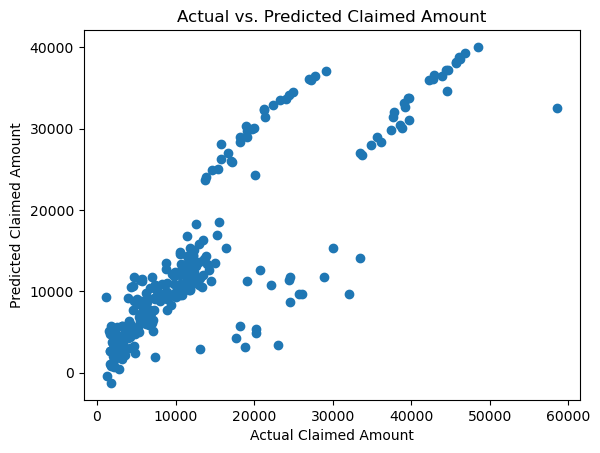

In [110]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Claimed Amount")
plt.ylabel("Predicted Claimed Amount")
plt.title("Actual vs. Predicted Claimed Amount")
plt.show()

### From this linear regression Model we got About 0.72 accuracy which is nearly to one.About 72% of the variability in the claim amounts can be explained by the features included in the model. This suggests that the chosen features have some influence on the predicted claim amounts